In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

## Importing data (just original for now)

In [133]:
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST',
       'g_flux_corr', 'nb921_hsc_flux_corr'
    ]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [134]:
data = pd.read_csv("../Data/Fangyou_data/Cleaned/combined_using_similar_columns.csv")
data['Source'] = 'Original'

In [135]:
X = data[features_num]
y = data[[y_column, 'Source', 'Xray', 'Opt_spec', 'IRAGN', 'Donley']]

## Filling nan's

In [136]:
# fill nans with 0s
X_filled = X.fillna(0)

## Normalisations

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_filled = scaler.fit_transform(X_filled)

## Running DBSCAN

In [137]:
sample = X_filled.sample(10000)

In [142]:
for i in np.linspace(1, 10e5, 1000):
    clustering = DBSCAN(eps=i, min_samples=10).fit(sample)
    print(i, np.unique(clustering.labels_, return_counts=True)[1])

1.0 [10000]
1002.0 [9905   22   65    8]
2003.0 [8534 1303   21   39   18   22   13   22    9   10    9]
3004.0 [6231 3681   10   10   12   24    8   16    8]
4005.0 [4434 5535    8    9    8    6]
5006.0 [3017 6965   11    7]
6007.0 [2026 7939   11    8    9    7]
7008.0 [1539 8454    7]
8009.0 [1145 8837    5   13]
9010.0 [ 905 9095]
10011.0 [ 738 9251   11]
11012.0 [ 603 9383   14]
12013.0 [ 496 9494   10]
13014.0 [ 435 9547   18]
14015.0 [ 378 9622]
15016.0 [ 325 9665   10]
16017.0 [ 296 9704]
17018.0 [ 272 9728]
18019.0 [ 260 9740]
19020.0 [ 228 9762   10]
20021.0 [ 197 9778   10    7    8]
21022.0 [ 178 9800   14    8]
22023.0 [ 168 9818   14]
23024.0 [ 157 9825   18]
24025.0 [ 142 9840   18]
25026.0 [ 129 9853   18]
26027.0 [ 123 9858   19]
27028.0 [ 121 9860   19]
28029.0 [ 111 9870   19]
29030.0 [ 104 9877   19]
30031.0 [  99 9882   19]
31032.0 [  91 9890   19]
32033.0 [  83 9898   19]
33034.0 [  79 9902   19]
34035.0 [  76 9904   20]
35036.0 [  72 9908   20]
36037.0 [  70 991

KeyboardInterrupt: 

## DBSCAN for t-sne

In [2]:
data = pd.read_csv('temp.csv')[['x', 'y']]

In [68]:
for i in np.linspace(1, 3, 1000):
    clustering = DBSCAN(eps=i, min_samples=10).fit(data)
    print(i, len(np.unique(clustering.labels_, return_counts=True)[1]))

1.0 134
1.002002002002002 136
1.004004004004004 134
1.006006006006006 133
1.008008008008008 132
1.01001001001001 134
1.012012012012012 133
1.014014014014014 135
1.016016016016016 136
1.018018018018018 138
1.02002002002002 142
1.022022022022022 142
1.024024024024024 142
1.026026026026026 143
1.028028028028028 145
1.03003003003003 146
1.032032032032032 149
1.034034034034034 152
1.0360360360360361 154
1.038038038038038 155
1.04004004004004 155
1.042042042042042 155
1.044044044044044 155
1.0460460460460461 156
1.048048048048048 157
1.05005005005005 159
1.052052052052052 159
1.054054054054054 160
1.0560560560560561 163
1.058058058058058 165
1.06006006006006 170
1.062062062062062 175
1.064064064064064 176
1.0660660660660661 177
1.068068068068068 179
1.07007007007007 182
1.072072072072072 183
1.074074074074074 186
1.0760760760760761 187
1.078078078078078 187
1.08008008008008 187
1.082082082082082 189
1.084084084084084 189
1.0860860860860861 190
1.088088088088088 197
1.09009009009009 199
1.092

1.7387387387387387 19
1.7407407407407407 18
1.7427427427427427 18
1.7447447447447448 18
1.7467467467467468 18
1.7487487487487487 17
1.7507507507507507 17
1.7527527527527527 16
1.7547547547547548 16
1.7567567567567568 16
1.7587587587587588 16
1.7607607607607607 16
1.7627627627627627 16
1.7647647647647648 16
1.7667667667667668 16
1.7687687687687688 18
1.7707707707707707 18
1.7727727727727727 18
1.7747747747747749 18
1.7767767767767768 17
1.7787787787787788 18
1.7807807807807807 18
1.7827827827827827 18
1.7847847847847849 18
1.7867867867867868 17
1.7887887887887888 17
1.7907907907907907 16
1.7927927927927927 16
1.7947947947947949 16
1.7967967967967968 16
1.7987987987987988 15
1.8008008008008007 15
1.8028028028028027 15
1.8048048048048049 15
1.8068068068068068 15
1.8088088088088088 15
1.810810810810811 15
1.8128128128128127 15
1.8148148148148149 14
1.8168168168168168 14
1.8188188188188188 14
1.820820820820821 13
1.8228228228228227 13
1.8248248248248249 13
1.8268268268268268 13
1.8288288288

2.5375375375375375 4
2.5395395395395397 4
2.5415415415415414 4
2.5435435435435436 4
2.5455455455455454 4
2.5475475475475475 4
2.5495495495495497 4
2.5515515515515514 4
2.5535535535535536 4
2.5555555555555554 4
2.5575575575575575 4
2.5595595595595597 4
2.5615615615615615 4
2.5635635635635636 4
2.5655655655655654 4
2.5675675675675675 4
2.5695695695695697 4
2.5715715715715715 4
2.5735735735735736 4
2.5755755755755754 4
2.5775775775775776 4
2.5795795795795797 4
2.5815815815815815 4
2.5835835835835836 4
2.5855855855855854 4
2.5875875875875876 4
2.5895895895895897 4
2.5915915915915915 4
2.5935935935935936 4
2.5955955955955954 4
2.5975975975975976 4
2.5995995995995997 4
2.6016016016016015 4
2.6036036036036037 4
2.6056056056056054 4
2.6076076076076076 4
2.6096096096096097 4
2.611611611611612 4
2.6136136136136137 4
2.6156156156156154 4
2.6176176176176176 4
2.6196196196196198 4
2.621621621621622 4
2.6236236236236237 4
2.6256256256256254 4
2.6276276276276276 4
2.6296296296296298 4
2.6316316316316

In [4]:
clustering = DBSCAN(eps=1, min_samples=10).fit(data)
np.unique(clustering.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6]),
 array([   5,  104,  317, 1136,   81,   19,   29,   15]))

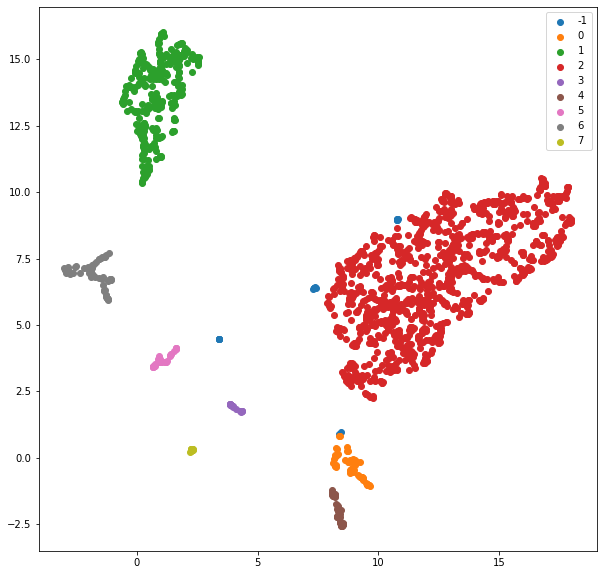

In [9]:
clustering = DBSCAN(eps=0.5, min_samples=10).fit(data)
labels = clustering.labels_

plt.figure(figsize=(10,10))
for i in np.unique(labels):
    plt.scatter(data['x'][labels==i], data['y'][labels==i], label=i)
plt.legend()

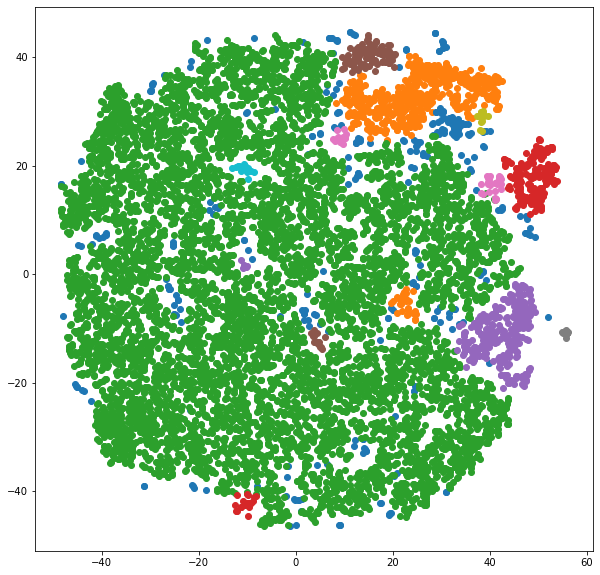

In [84]:
clustering = DBSCAN(eps=1.75, min_samples=10).fit(data)
labels = clustering.labels_

plt.figure(figsize=(10,10))
for i in np.unique(labels):
    plt.scatter(data['x'][labels==i], data['y'][labels==i])